Chapter 02

# 矩阵乘法两个视角
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用`numpy`生成两个随机矩阵$A$和$B$并计算其矩阵乘积$C$，然后用`seaborn`绘制矩阵热图以可视化矩阵乘法的几何含义。矩阵$A$的维度为$m \times p$，矩阵$B$的维度为$p \times n$，其乘积$C = A \times B$的维度为$m \times n$。代码从两种视角展示了矩阵乘法的计算过程。

### 代码细节

1. **第一视角** - 矩阵整体乘法：
   - 矩阵乘法$A \times B = C$定义为将$A$的每一行与$B$的每一列进行点积，得到$C$中的每个元素。对于矩阵$C$的元素$C[i,j]$，计算公式为：

     $$
     C[i, j] = \sum_{k=1}^{p} A[i, k] \cdot B[k, j]
     $$

   - 使用热图分别展示矩阵$A$、$B$和$C$，使得乘法关系$A \times B = C$清晰可见。

2. **第二视角** - 分解矩阵乘法：
   - 通过将$C$分解为$A$的每一列和$B$的对应行的外积之和展示矩阵乘法。设$A$的列向量和$B$的行向量分别为$A[:, k]$和$B[k, :]$，则可以将$C$分解为：

     $$
     C = C_1 + C_2 + \dots + C_p
     $$

   - 其中每个$C_k$表示$A$的第$k$列与$B$的第$k$行的外积，计算公式为：

     $$
     C_k = A[:, k] \times B[k, :]
     $$

   - 分别绘制出矩阵$C$的分量$C_1$、$C_2$和$C_3$（假设$p=3$），并展示出它们的逐项相加关系，即：

     $$
     C = C_1 + C_2 + C_3
     $$

### 总结

该代码通过两种视角展示了矩阵乘法的几何过程，第一视角显示了矩阵的整体乘法关系，而第二视角则将矩阵乘法分解为逐列计算的外积累加。这种分解方式有助于理解矩阵乘法如何将行、列元素组合成新的矩阵。最终结果以热图形式显示，增强了对矩阵乘法结构的直观理解。

## 导入库并设置随机种子

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(7)  # 设置随机种子以确保结果可重复

## 生成矩阵A和矩阵B

In [2]:
m = 6  # 矩阵A的行数
p = 3  # 矩阵A的列数和矩阵B的行数
n = 4  # 矩阵B的列数

In [3]:
A = np.random.uniform(-1, 1, m * p).reshape(m, p)  # 随机生成矩阵A
A  # 输出矩阵A

array([[-8.47383421e-01,  5.59837584e-01, -1.23181537e-01],
       [ 4.46930356e-01,  9.55979024e-01,  7.69917408e-02],
       [ 2.24092732e-03, -8.55897733e-01, -4.63122040e-01],
       [-2.34998349e-04,  3.58459992e-01,  6.07478072e-01],
       [-2.38117734e-01, -8.68127306e-01, -4.23708801e-01],
       [ 8.19187055e-01, -5.73229293e-01, -9.57520764e-02]])

In [4]:
B = np.random.uniform(-1, 1, p * n).reshape(p, n)  # 随机生成矩阵B
B  # 输出矩阵B

array([[ 0.86241204, -0.95020154,  0.20109783,  0.900259  ],
       [-0.53939424,  0.09697984,  0.81825675, -0.73366111],
       [ 0.04682516,  0.50081972,  0.33802648, -0.06449428]])

In [5]:
C = A @ B  # 计算矩阵A和矩阵B的乘积得到矩阵C
C  # 输出矩阵C

array([[-1.03853483,  0.79778625,  0.24604529, -1.16565111],
       [-0.12660631, -0.29340424,  0.89813826, -0.30397708],
       [ 0.44191315, -0.31707481, -0.85644097,  0.65982502],
       [-0.16510866,  0.33922368,  0.49860873, -0.30237858],
       [ 0.24306704, -0.07013273, -0.90146078,  0.4498704 ],
       [ 1.01118975, -0.88193902, -0.33667873,  1.16421202]])

In [6]:
all_max = 1  # 热图的最大显示值
all_min = -1  # 热图的最小显示值

## 矩阵乘法的第一种视角

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6')])

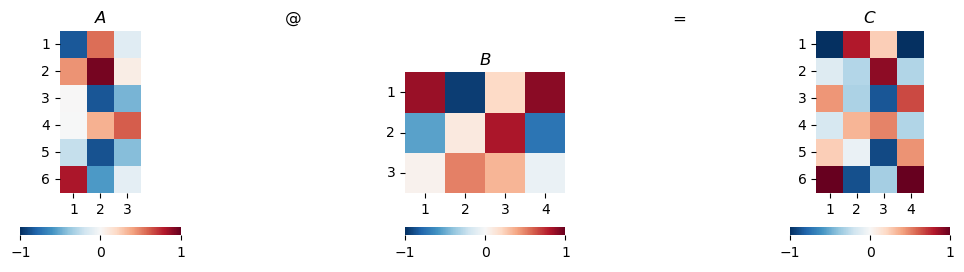

In [7]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(A, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1, m+1), xticklabels=np.arange(1, p+1))
ax.set_aspect("equal")
plt.title('$A$')
plt.yticks(rotation=0)

plt.sca(axs[1])
plt.title('$@$')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(B, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1, p+1), xticklabels=np.arange(1, n+1))
ax.set_aspect("equal")
plt.title('$B$')
plt.yticks(rotation=0)

plt.sca(axs[3])
plt.title('$=$')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(C, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1, m+1), xticklabels=np.arange(1, n+1))
ax.set_aspect("equal")
plt.title('$C$')
plt.yticks(rotation=0)

## 矩阵乘法的第二种视角

In [8]:
C1 = A[:, [0]] @ B[[0], :]  # 第1列计算结果
C1

array([[-7.30793664e-01,  8.05185036e-01, -1.70406971e-01,
        -7.62864552e-01],
       [ 3.85438119e-01, -4.24673914e-01,  8.98767269e-02,
         4.02353075e-01],
       [ 1.93260270e-03, -2.12933260e-03,  4.50645632e-04,
         2.01741499e-03],
       [-2.02665405e-04,  2.23295794e-04, -4.72576592e-05,
        -2.11559379e-04],
       [-2.05355600e-01,  2.26259838e-01, -4.78849607e-02,
        -2.14367633e-01],
       [ 7.06476779e-01, -7.78392806e-01,  1.64736743e-01,
         7.37480520e-01]])

In [9]:
C2 = A[:, [1]] @ B[[1], :]  # 第2列计算结果
C2

array([[-0.30197317,  0.05429296,  0.45809088, -0.41073106],
       [-0.51564958,  0.09271069,  0.78223629, -0.70136463],
       [ 0.46166631, -0.08300482, -0.7003441 ,  0.62793888],
       [-0.19335126,  0.03476339,  0.29331231, -0.26298816],
       [ 0.46826287, -0.08419085, -0.71035103,  0.63691124],
       [ 0.30919658, -0.05559168, -0.46904874,  0.42055604]])

In [10]:
C3 = A[:, [2]] @ B[[2], :]  # 第3列计算结果
C3

array([[-0.005768  , -0.06169174, -0.04163862,  0.0079445 ],
       [ 0.00360515,  0.03855898,  0.02602525, -0.00496553],
       [-0.02168576, -0.23194065, -0.15654751,  0.02986872],
       [ 0.02844526,  0.304237  ,  0.20534368, -0.03917886],
       [-0.01984023, -0.21220172, -0.1432248 ,  0.02732679],
       [-0.00448361, -0.04795453, -0.03236674,  0.00617546]])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6')])

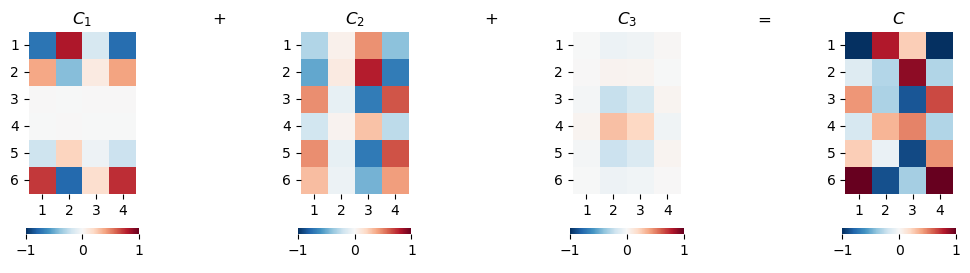

In [11]:
fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(C1, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1, m+1), xticklabels=np.arange(1, n+1))
ax.set_aspect("equal")
plt.title('$C_1$')
plt.yticks(rotation=0)

plt.sca(axs[1])
plt.title('$+$')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(C2, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1, m+1), xticklabels=np.arange(1, n+1))
ax.set_aspect("equal")
plt.title('$C_2$')
plt.yticks(rotation=0)

plt.sca(axs[3])
plt.title('$+$')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(C3, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1, m+1), xticklabels=np.arange(1, n+1))
ax.set_aspect("equal")
plt.title('$C_3$')
plt.yticks(rotation=0)

plt.sca(axs[5])
plt.title('$=$')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(C, cmap='RdBu_r', vmax=all_max, vmin=all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1, m+1), xticklabels=np.arange(1, n+1))
ax.set_aspect("equal")
plt.title('$C$')
plt.yticks(rotation=0)